In [2]:
## Main notebook for performing analysis of word embeddings
## James Fodor 2022
## Python 3.8

import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import json
import pandas as pd

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.stats import spearmanr
from scipy.cluster.hierarchy import dendrogram, linkage

from similarity_analysis import similarity_analysis # custom class for analysis

sns.set() #get seaborn to work

## Load and Process Data (run all first)

In [3]:
# Specify locations of data
data_root = 'D:/Study and Projects/School Work/Year 25 - PhD 1/Data//' # root location of data
word_embed_loc = 'Word Embeddings//' # subfolder with all the word embedding folders
dataset_loc = 'Word Similarity Data/Word Similarities Final//' # subfolder with all the word similarity files

# Load data and functions
sim = similarity_analysis(data_root, word_embed_loc, dataset_loc)

Total tested words: 119540
Unique tested words: 7935
Available models:
['CW_vectors', 'dm_vectors', 'dissect_ppmi', 'word2vec_skip', 'gensim_skip', 'gensim_BNC', 'gensim_cbow', 'glove', 'lexvec', 'fasttext', 'elmo', 'conceptnet', 'conceptnet_normalised', 'wordnet', 'bert_large', 'gpt2_large', 'electra_large', 'albert_xxlarge', 'xlnet_large', 'xlm_roberta', 't5_large', 'comet-atomic', 'sembert', 'libert_2m', 'ernie_base_0', 'ernie_base_1', 'ernie_base_2', 'ernie_base_3', 'ernie_base_4', 'ernie_base_5', 'ernie_base_6', 'ernie_base_7', 'ernie_base_8', 'ernie_base_9', 'ernie_base_10', 'ernie_base_11', 'ernie_base_12', 'ernie_context_1', 'ernie_context_2', 'ernie_context_3', 'ernie_context_4', 'ernie_context_5', 'ernie_context_6', 'ernie_context_7', 'ernie_context_8', 'ernie_context_9', 'ernie_context_10', 'ernie_context_11', 'ernie_context_12', 'ernie_context_1_v', 'ernie_context_2_v', 'ernie_context_3_v', 'ernie_context_4_v', 'ernie_context_5_v', 'ernie_context_6_v', 'ernie_context_7_v', 

In [ ]:
# Import all word embedding models (takes ~5 mins)
# only needed to compute similarities from scratch
sim.import_all_models(full_import=False)

In [6]:
# Load in model-dataset similarities data, or if not found compute and save (this takes ~10 mins)   
try:
    with open("all_model_dataset_cosine_sims.json", "r") as file:
        sim.model_sim_storage = json.load(file)
        
except FileNotFoundError:
    # Compute all word pair similarities
    sim.compute_all_model_sims()
    
    # Load in sense similarity data (in different format so needs to be done separately)
    sense_similarity_list = ['ernie_dictionary_max', 'ernie_dictionary_mean']
    location = 'Analysis Results/Word Similarities/Sense embed sims/'
    sim.import_sense_sim_data(sense_similarity_list, location)
    
    # Save similarities data
    with open("all_model_dataset_cosine_sims.json", "w") as file:
        json.dump(sim.model_sim_storage, file)

In [5]:
# Print all the dataset and models
print('All Datasets')
print(np.array(sim.datasets))
print('All Models')
print(np.array(sim.models))

All Datasets
['RG65' 'YP130' 'Verb143' 'MTurk287' 'MTurk213' 'MTurk771' 'WS353' 'WS198'
 'RW' 'RW_mod' 'MEN' 'MEN_animals' 'MEN_artefacts' 'MEN_colours'
 'MEN_foods' 'MEN_locations' 'MEN_nature' 'MEN_plants' 'MEN_social'
 'SimVerb' 'SimVerb_mod' 'SimVerb_noant' 'SimLex' 'SimLex_mod' 'SimLexN'
 'SimLexN_mod' 'SimLexV' 'SimLexV_mod' 'SimLexA' 'MultiSim' 'MultiSimV'
 'MultiSimV_mod' 'MultiSimN' 'MultiSimN_mod' 'SemEval2017' 'TR1058'
 'combined_nouns' 'combined_verbs' 'combined_full' 'LNCD_5k' 'Lee2300'
 'Alternatives_it' 'Alternatives_there']
All Models
['CW_vectors' 'dm_vectors' 'dissect_ppmi' 'word2vec_skip' 'gensim_skip'
 'gensim_BNC' 'gensim_cbow' 'glove' 'lexvec' 'fasttext' 'elmo'
 'conceptnet' 'conceptnet_normalised' 'wordnet' 'bert_large' 'gpt2_large'
 'electra_large' 'albert_xxlarge' 'xlnet_large' 'xlm_roberta' 't5_large'
 'comet-atomic' 'sembert' 'libert_2m' 'ernie_base_0' 'ernie_base_1'
 'ernie_base_2' 'ernie_base_3' 'ernie_base_4' 'ernie_base_5'
 'ernie_base_6' 'ernie_base_7' '

## Basic Analysis and Plotting

In [84]:
## Run all models against all datasets
save = True
for dataset_name in sim.datasets:
    for model_name in sim.models:

        # run analysis
        data, model, scale, _, _, words, word_pairs = sim.store_model_dataset_sims(model_name, dataset_name, [], printing=True, full_import=False)
        dataset_scale = math.ceil(scale) # round up
        pearson_r, spearman_r, differences = sim.compute_embed_correls(data, model, dataset_scale, printing=True)

        # save results if wanted
        if save==True:
            sim.save_results(model_name, dataset_name, word_pairs, differences, list(np.array(data)/dataset_scale), model) 

evaluating CW_vectors against RG65
included words: 48 out of 48
excluded words: 0 out of 48
missing words: 0 out of 48
pearson: 0.469 
spearman: 0.467

Results saved
evaluating dissect_ppmi against RG65
included words: 48 out of 48
excluded words: 0 out of 48
missing words: 0 out of 48
pearson: 0.740 
spearman: 0.735

Results saved
evaluating word2vec_skip against RG65
included words: 48 out of 48
excluded words: 0 out of 48
missing words: 0 out of 48
pearson: 0.696 
spearman: 0.698

Results saved
evaluating gensim_skip against RG65
included words: 48 out of 48
excluded words: 0 out of 48
missing words: 0 out of 48
pearson: 0.735 
spearman: 0.714

Results saved
evaluating gensim_BNC against RG65
included words: 48 out of 48
excluded words: 0 out of 48
missing words: 0 out of 48
pearson: 0.728 
spearman: 0.753

Results saved
evaluating gensim_cbow against RG65
included words: 48 out of 48
excluded words: 0 out of 48
missing words: 0 out of 48
pearson: 0.695 
spearman: 0.680

Results sav

c:\Users\fods1\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
c:\Users\fods1\anaconda3\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
c:\Users\fods1\anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\fods1\anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
c:\Users\fods1\anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Results saved
evaluating ernie_context_7_v against YP130
included words: 147 out of 147
excluded words: 0 out of 147
missing words: 0 out of 147
pearson: 0.691 
spearman: 0.634

Results saved
evaluating ernie_context_8_v against YP130
included words: 147 out of 147
excluded words: 0 out of 147
missing words: 0 out of 147
pearson: 0.682 
spearman: 0.629

Results saved
evaluating ernie_context_9_v against YP130
included words: 147 out of 147
excluded words: 0 out of 147
missing words: 0 out of 147
pearson: 0.673 
spearman: 0.611

Results saved
evaluating ernie_context_10_v against YP130
included words: 147 out of 147
excluded words: 0 out of 147
missing words: 0 out of 147
pearson: 0.661 
spearman: 0.598

Results saved
evaluating ernie_context_11_v against YP130
included words: 147 out of 147
excluded words: 0 out of 147
missing words: 0 out of 147
pearson: 0.690 
spearman: 0.627

Results saved
evaluating ernie_context_12_v against YP130
included words: 147 out of 147
excluded words: 0 o

In [ ]:
## Run a single model against a single dataset
save = True
model_name = 'conceptnet'
dataset_name = 'SimLexV_mod'

# run analysis
data, model, scale, _, _, words, word_pairs = sim.store_model_dataset_sims(model_name, dataset_name, [], printing=True, full_import=False)
dataset_scale = math.ceil(scale) # round up
pearson_r, spearman_r, differences = sim.compute_embed_correls(data, model, dataset_scale, printing=True)

# save results if wanted
if save==True:
    sim.save_results(model_name, dataset_name, word_pairs, differences, list(np.array(data)/dataset_scale), model) 

evaluating conceptnet against MEN
included words: 751 out of 751
excluded words: 0 out of 751
missing words: 0 out of 751
evaluating conceptnet against SimVerb
included words: 827 out of 827
excluded words: 0 out of 827
missing words: 0 out of 827


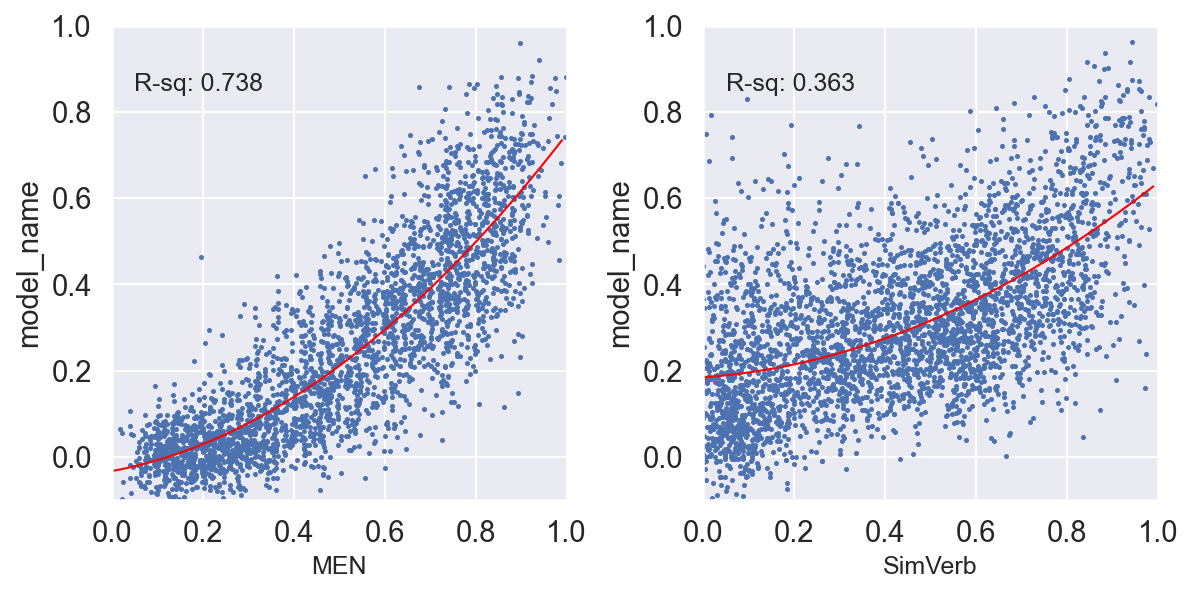

In [50]:
## Plot scatterplots of dataset vs model

# Specify model and datasets to plot
model_name = 'conceptnet'
datasets = ['MEN','SimVerb']

# Define properties of main plot
width = 9
height = 4
sns.set()
fig = plt.figure(figsize=(width,height), facecolor='white', dpi=150)
fig.subplots_adjust(wspace=0.3, hspace=0.3) # space between subplots

# Generate series of subplots using add_subplot function
i=1
for dataset_name in datasets:

    # Get data to use
    data, model, scale, _, _, words, word_pairs = sim.store_model_dataset_sims(model_name, dataset_name, [], printing=True, full_import=False)
    dataset_scale = math.ceil(scale) # round up
    data = (np.array(data)/dataset_scale)+np.random.uniform(-0.008, 0.008, len(data)) # add jitter to experimental values
    full_data_np = np.array([data,model])

    # Generate subplot
    # plot_num = [2,3,i] # for plotting six
    plot_num = [1,2,i] # for plotting two
    model_label = 'ConceptNet'
    sim.gen_sub_plot(full_data_np.T, fig, plot_num, model_label, dataset_name, linear_reg=False, poly_reg=True) # add subplot
    i=i+1

fig.subplots_adjust(top=0.90) # remove excess white space under title
plt.show()

## Model vs Model Correlations

evaluating CW_vectors against CW_vectors
included words: 750 out of 751
excluded words: 0 out of 751
missing words: 1 out of 751
pearson: 1.000 
spearman: 1.000

evaluating CW_vectors against dissect_ppmi
included words: 750 out of 751
excluded words: 0 out of 751
missing words: 1 out of 751
pearson: 0.747 
spearman: 0.748

evaluating CW_vectors against word2vec_skip
included words: 750 out of 751
excluded words: 0 out of 751
missing words: 1 out of 751
pearson: 0.745 
spearman: 0.745

evaluating CW_vectors against gensim_skip
included words: 747 out of 751
excluded words: 0 out of 751
missing words: 4 out of 751
pearson: 0.723 
spearman: 0.723

evaluating CW_vectors against gensim_BNC
included words: 743 out of 751
excluded words: 0 out of 751
missing words: 7 out of 751
pearson: 0.674 
spearman: 0.673

evaluating CW_vectors against gensim_cbow
included words: 748 out of 751
excluded words: 0 out of 751
missing words: 3 out of 751
pearson: 0.651 
spearman: 0.657

evaluating CW_vectors

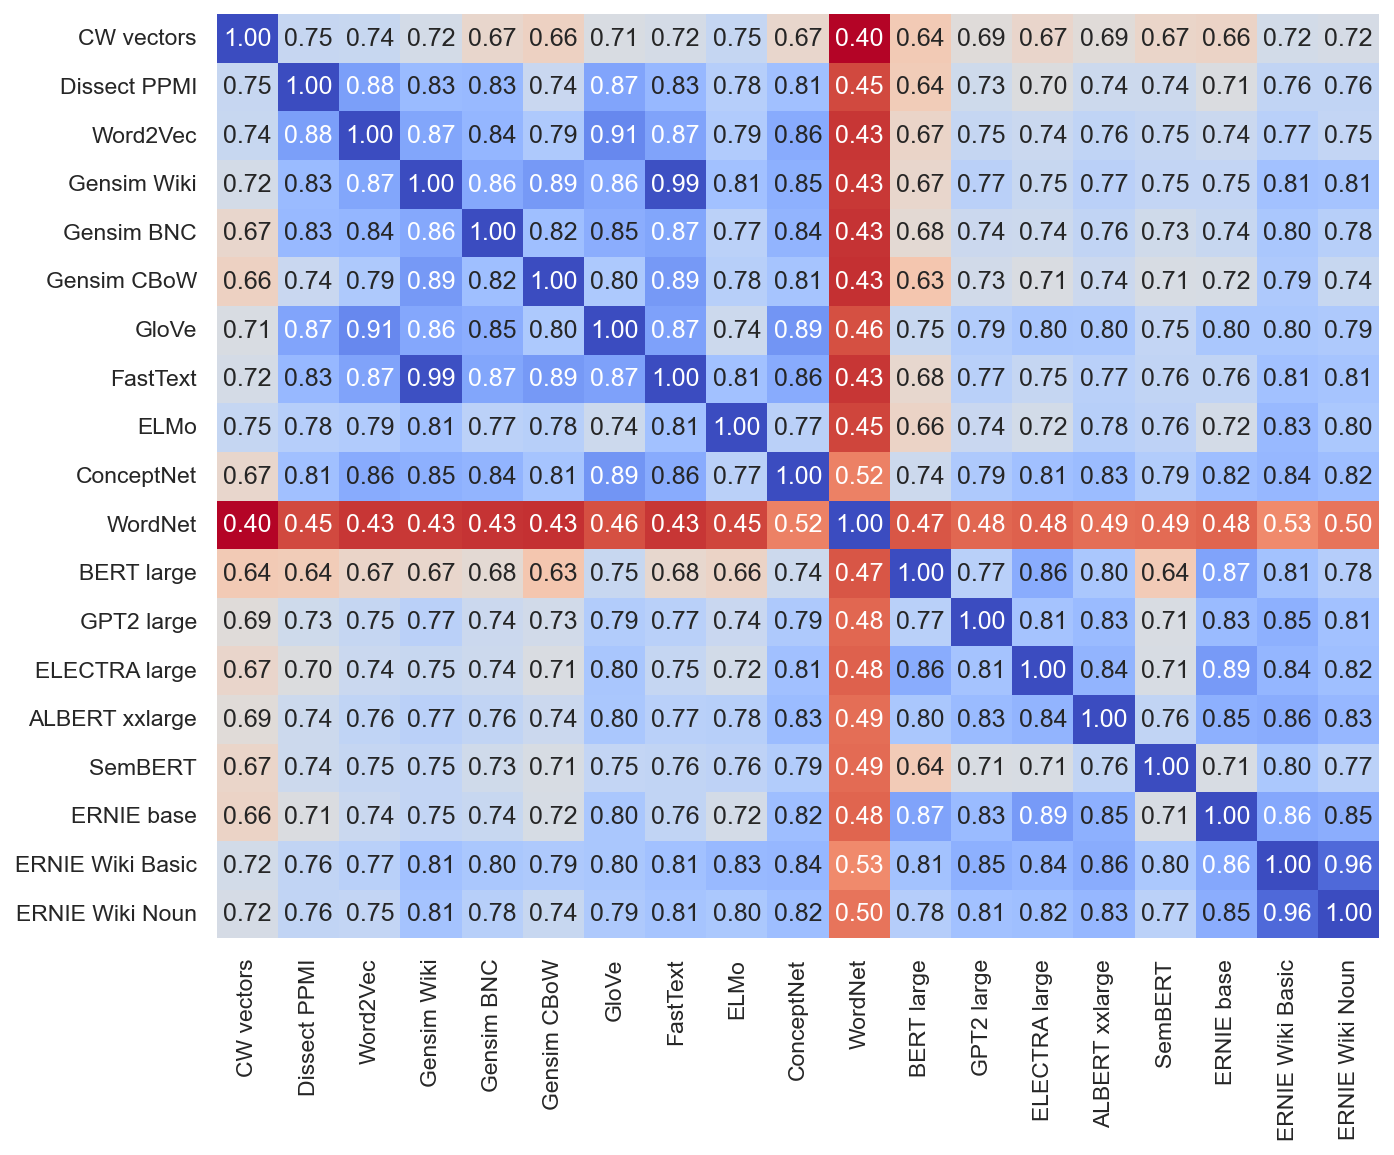

In [51]:
## Correlation matrix for nouns

# Calculate set of model-model correlations
included_models = np.array(sim.models)[np.append(np.arange(0,16),np.array([17,35,58]))] # necesary to exclude wordnet from the vocab set as it has so few words; also exclude ernie_wiki from nouns
vocab_set = 'MEN'
excluded_vocab = []
correlation_matrix = sim.compute_models_corr_matrix(included_models, vocab_set, excluded_vocab)
# np.savetxt("models_correlation.txt", correlation_matrix, fmt='%.3f')

# print heatmap of series of correlations
fig, ax = plt.subplots(figsize=(10,8), facecolor='white', dpi=150)
model_names = ['CW vectors', 'Dissect PPMI', 'Word2Vec', 'Gensim Wiki', 'Gensim BNC', 'Gensim CBoW', 'GloVe', 
                'FastText', 'ELMo', 'ConceptNet', 'WordNet', 'BERT large', 'GPT2 large', 'ELECTRA large', 'ALBERT xxlarge', 
                'SemBERT', 'ERNIE base', 'ERNIE Wiki Basic', 'ERNIE Wiki Noun']
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', ax=ax, cmap='coolwarm_r', cbar=False, xticklabels=model_names, yticklabels=model_names)
plt.show()

evaluating CW_vectors against CW_vectors
included words: 810 out of 827
excluded words: 0 out of 827
missing words: 16 out of 827
pearson: 1.000 
spearman: 1.000

evaluating CW_vectors against dissect_ppmi
included words: 810 out of 827
excluded words: 0 out of 827
missing words: 16 out of 827
pearson: 0.638 
spearman: 0.635

evaluating CW_vectors against word2vec_skip
included words: 810 out of 827
excluded words: 0 out of 827
missing words: 16 out of 827
pearson: 0.624 
spearman: 0.616

evaluating CW_vectors against gensim_skip
included words: 806 out of 827
excluded words: 0 out of 827
missing words: 20 out of 827
pearson: 0.569 
spearman: 0.575

evaluating CW_vectors against gensim_BNC
included words: 806 out of 827
excluded words: 0 out of 827
missing words: 20 out of 827
pearson: 0.445 
spearman: 0.451

evaluating CW_vectors against gensim_cbow
included words: 806 out of 827
excluded words: 0 out of 827
missing words: 20 out of 827
pearson: 0.480 
spearman: 0.483

evaluating CW_v

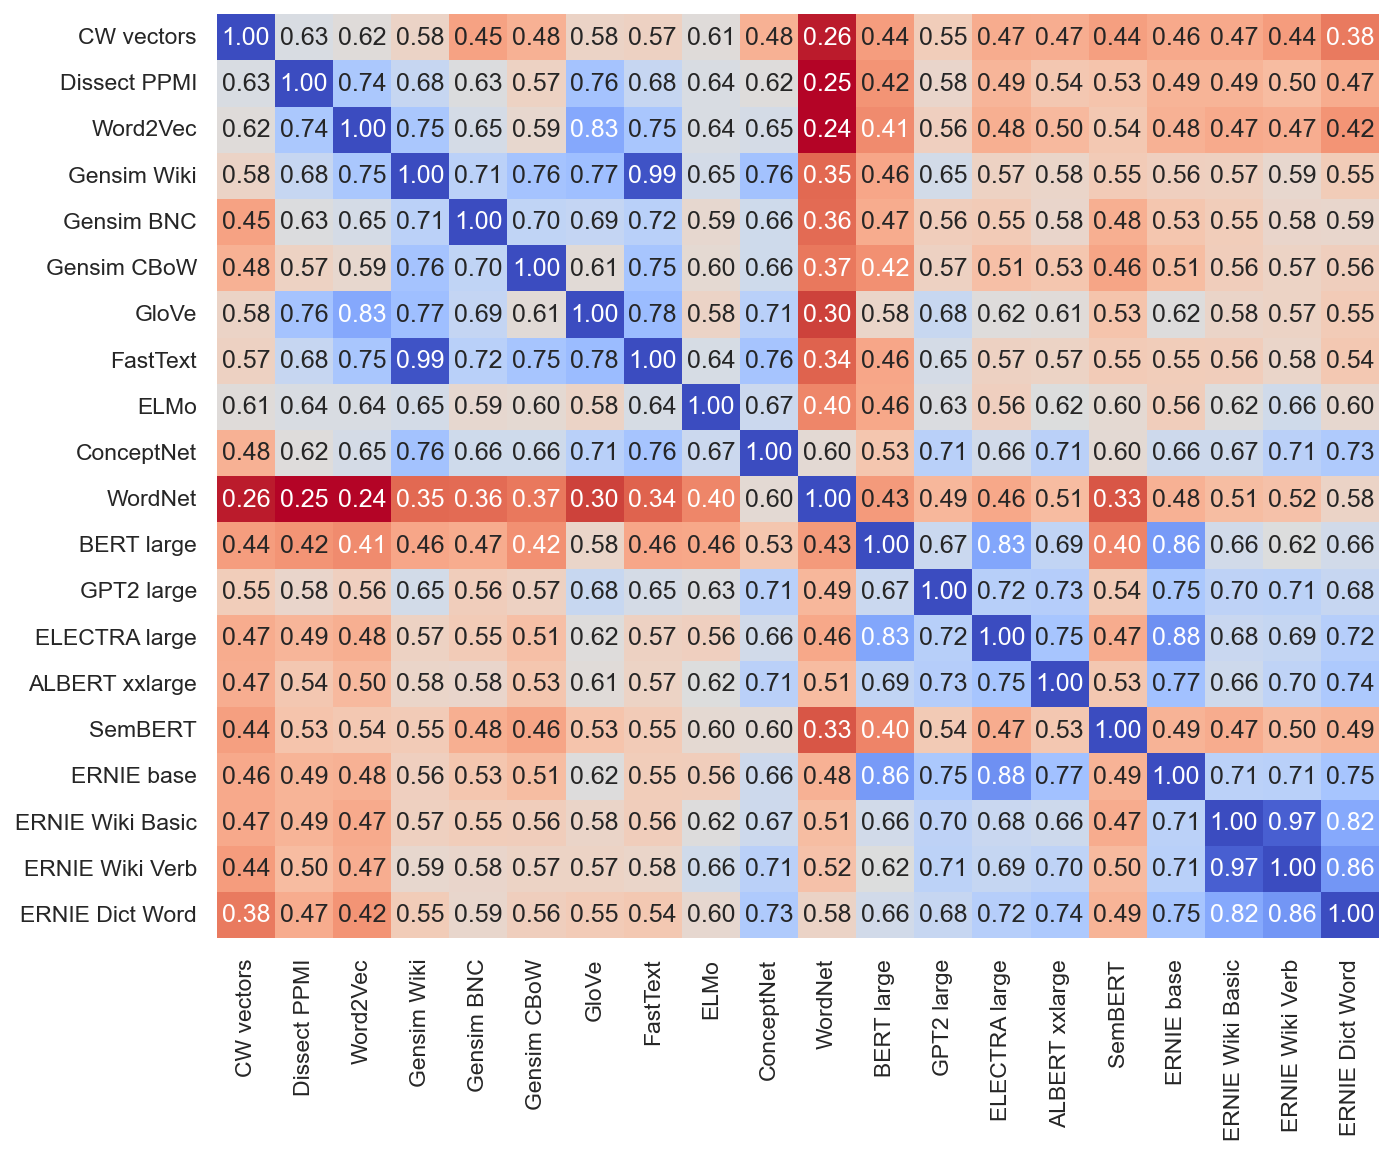

In [52]:
## Correlation matrix for verbs

# Calculate set of model-model correlations
included_models = np.array(sim.models)[np.append(np.arange(0,16),np.array([17,34,46,70]))] # necesary to exclude wordnet from the vocab set as it has so few words; also exclude ernie_context from nouns
vocab_set = 'SimVerb'
excluded_vocab = []
correlation_matrix = sim.compute_models_corr_matrix(included_models, vocab_set, excluded_vocab)
# np.savetxt("models_correlation.txt", correlation_matrix, fmt='%.3f')

# print heatmap of series of correlations
fig, ax = plt.subplots(figsize=(10,8), facecolor='white', dpi=150)
model_names = ['CW vectors', 'Dissect PPMI', 'Word2Vec', 'Gensim Wiki', 'Gensim BNC', 'Gensim CBoW', 'GloVe', 
               'FastText', 'ELMo', 'ConceptNet', 'WordNet', 'BERT large', 'GPT2 large', 'ELECTRA large', 'ALBERT xxlarge', 
               'SemBERT', 'ERNIE base', 'ERNIE Wiki Basic', 'ERNIE Wiki Verb', 'ERNIE Dict Word']
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', ax=ax, cmap='coolwarm_r', cbar=False, xticklabels=model_names, yticklabels=model_names)
plt.show()

## Model vs Dataset Results

In [85]:
## Compute and store model-dataset correlations from similarity data

# define models we want to work with
verb_datasets = ['YP130', 'Verb143', 'SimVerb', 'SimVerb_mod', 'SimLexV', 'SimLexV_mod', 'MultiSimV', 'MultiSimV_mod']
verb_models = ['CW_vectors', 'dissect_ppmi', 'word2vec_skip', 'gensim_skip', 'gensim_BNC', 'gensim_cbow', 'glove', 
                   'fasttext', 'elmo', 'conceptnet', 'wordnet', 'bert_large', 'gpt2_large', 'electra_large', 'albert_xxlarge', 
                   'sembert', 'ernie_base_0', 'ernie_context_5', 'ernie_context_5_v', 'ernie_oxford_5', 'ernie_dictionary_mean_5', 'ernie_dictionary_max_5']

# define storage dictionaries
model_data_correls = {} # store spearman correlations
dataset_sizes = {}
all_missing_vocab = {}

# loop over all models
for model_name in verb_models:
    correlations = []
    lengths = []
    missing_vocabs = []

    # loop over all datasets
    for dataset_name in verb_datasets:
        available_model_sims = []
        available_dataset_sims = []
        missing_vocab = []
        
        # loop over all word pairs
        for word_pair in sim.dataset_sim_storage[dataset_name]:
            dataset_sim = sim.dataset_sim_storage[dataset_name][word_pair]
            try:
                model_sim = sim.model_sim_storage[model_name][word_pair]
                available_model_sims.append(model_sim)
                available_dataset_sims.append(dataset_sim)
            except KeyError: # if no model sims for that wordpair
                missing_vocab.append(word_pair)
            if math.isnan(model_sim): # keep track of nan values
                missing_vocab.append(word_pair)
        
        # compute and store correlations
        correlation = spearmanr(available_model_sims,available_dataset_sims,nan_policy='omit')[0]
        correlations.append(correlation)
        missing_vocabs.append(len(missing_vocab))
        
        # check if we should exclude this one
        sims_length = len(available_model_sims)-len(missing_vocab)
        lengths.append(sims_length)
        if sims_length<0.4*len(sim.dataset_sim_storage[dataset_name]):
            correlations[-1] = np.nan # remove most recent if too little data

    # save results to full data dictionary
    model_data_correls[model_name] = correlations
    dataset_sizes[model_name] = lengths
    all_missing_vocab[model_name] = missing_vocabs
    
# Save results of all model-dataset correlations in a file
datasets_to_plot = verb_datasets+['Average']
model_weights = [130,143,0,3214,0,188,0,428] # size of verb datasets for wtd av

save_file = open('model_dataset_correlations_verbs.txt', "w", encoding='utf-8')
save_file.write(str(datasets_to_plot)[1:-1])
save_file.write('\n')

for model in model_data_correls.keys():
    ma = np.ma.MaskedArray(model_data_correls[model], mask=np.isnan(model_data_correls[model])) # use masked array to ignore nans
    average_over_datasets = np.ma.average(ma, weights=model_weights) # get average over models
    line_string = model+', '+str(model_data_correls[model])[1:-1]+', '+str(average_over_datasets)

    save_file.writelines(line_string)
    save_file.write('\n')

save_file.close()

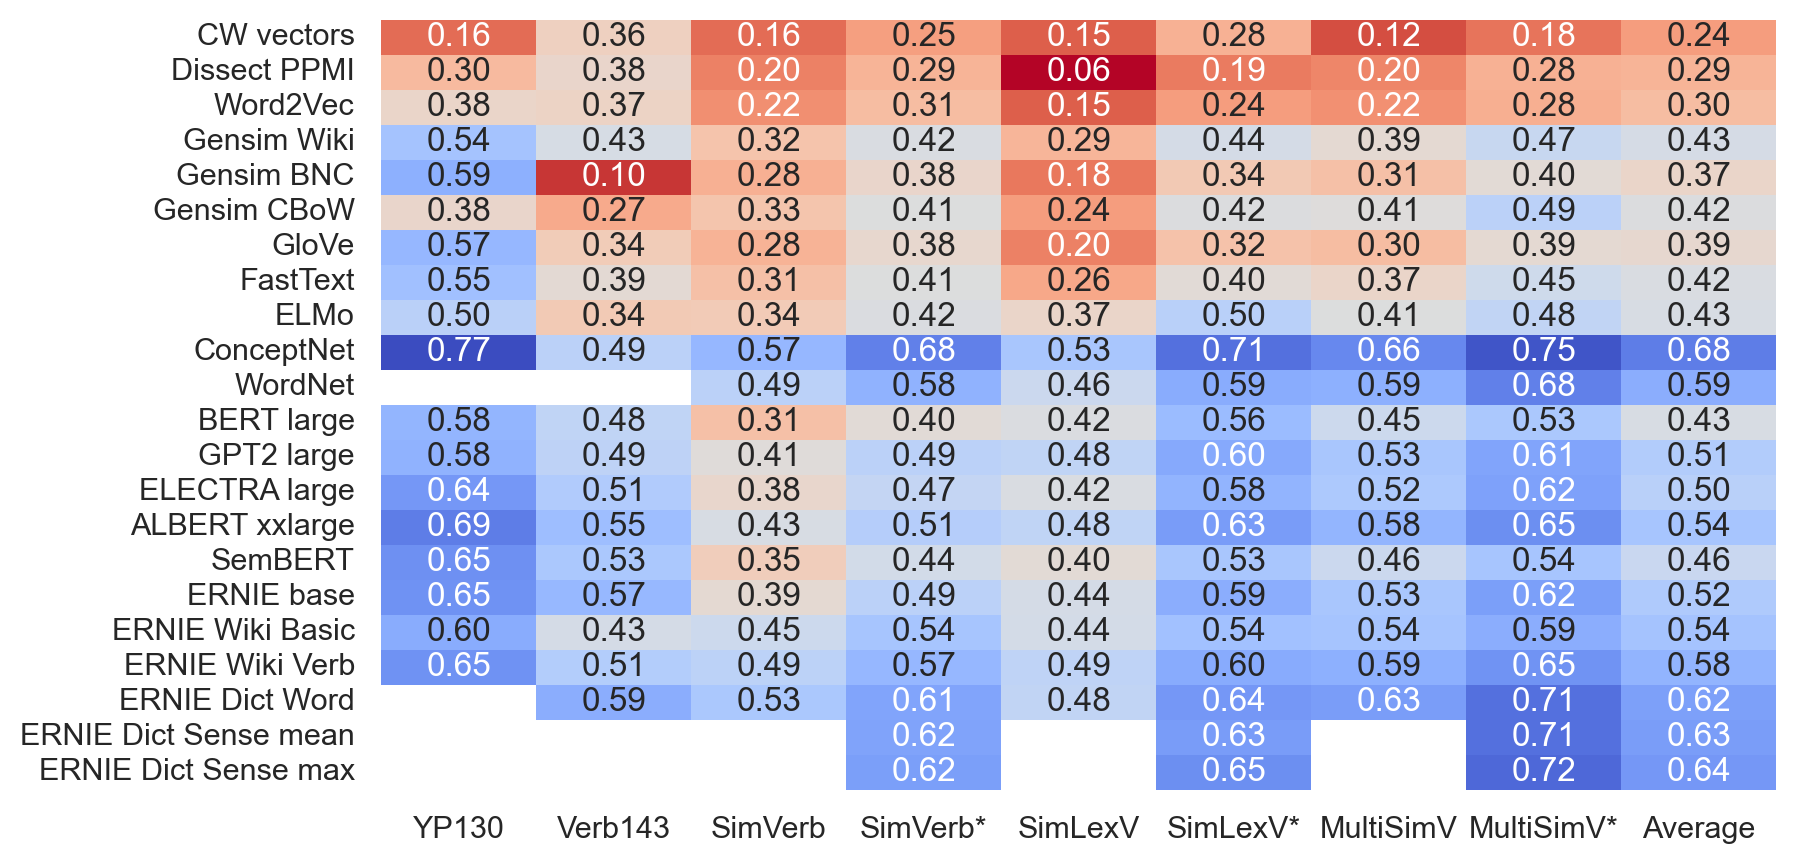

In [13]:
## Print heatmap of model-dataset correlations for verbs/nouns used pre-computed data
type = 'verbs' # whichever we want to plot

if type=='nouns':
    model_names = ['CW vectors', 'Dissect PPMI', 'Word2Vec', 'Gensim Wiki', 'Gensim BNC', 'Gensim CBoW', 'GloVe', 
                   'FastText', 'ELMo', 'ConceptNet', 'WordNet', 'BERT large', 'GPT2 large', 'ELECTRA large', 'ALBERT xxlarge', 
                   'SemBERT', 'ERNIE base', 'ERNIE Wiki Basic', 'ERNIE Wiki Noun']
    dataset_names = ['RG65','MT287','MT771','WS198','RW','MEN','SimLex','MultiSim','SE2017','TR1058','Average']
    file_location = sim.folder_loc+'Analysis Results\Word Similarities\Results for Figures\Full Model vs Data Analysis (Figures 1,5)\model_dataset_correlations_nouns.txt'
    table = pd.read_table(file_location, index_col=0, header=0, sep=",", skip_blank_lines=True)
    
elif type=='verbs':
    model_names = ['CW vectors', 'Dissect PPMI', 'Word2Vec', 'Gensim Wiki', 'Gensim BNC', 'Gensim CBoW', 'GloVe', 
                   'FastText', 'ELMo', 'ConceptNet', 'WordNet', 'BERT large', 'GPT2 large', 'ELECTRA large', 'ALBERT xxlarge', 
                   'SemBERT', 'ERNIE base', 'ERNIE Wiki Basic', 'ERNIE Wiki Verb', 'ERNIE Dict Word', 'ERNIE Dict Sense mean', 'ERNIE Dict Sense max']
    dataset_names = ['YP130', 'Verb143', 'SimVerb', 'SimVerb*', 'SimLexV', 'SimLexV*', 'MultiSimV', 'MultiSimV*', 'Average']
    file_location = sim.folder_loc+'Analysis Results\Word Similarities\Results for Figures\Full Model vs Data Analysis (Figures 1,5)\model_dataset_correlations_verbs.txt'
    table = pd.read_table(file_location, index_col=0, header=0, sep=",", skip_blank_lines=True)
    
width = 9
height = 5
fig, ax = plt.subplots(figsize=(width,height), facecolor='white', dpi=200)
ax.grid(False)
sns.heatmap(table, annot=True, fmt='.2f', ax=ax, cmap='coolwarm_r', cbar=False, xticklabels=dataset_names, yticklabels=model_names)
plt.show()

## Model vs Dataset Bootstrapping Analysis

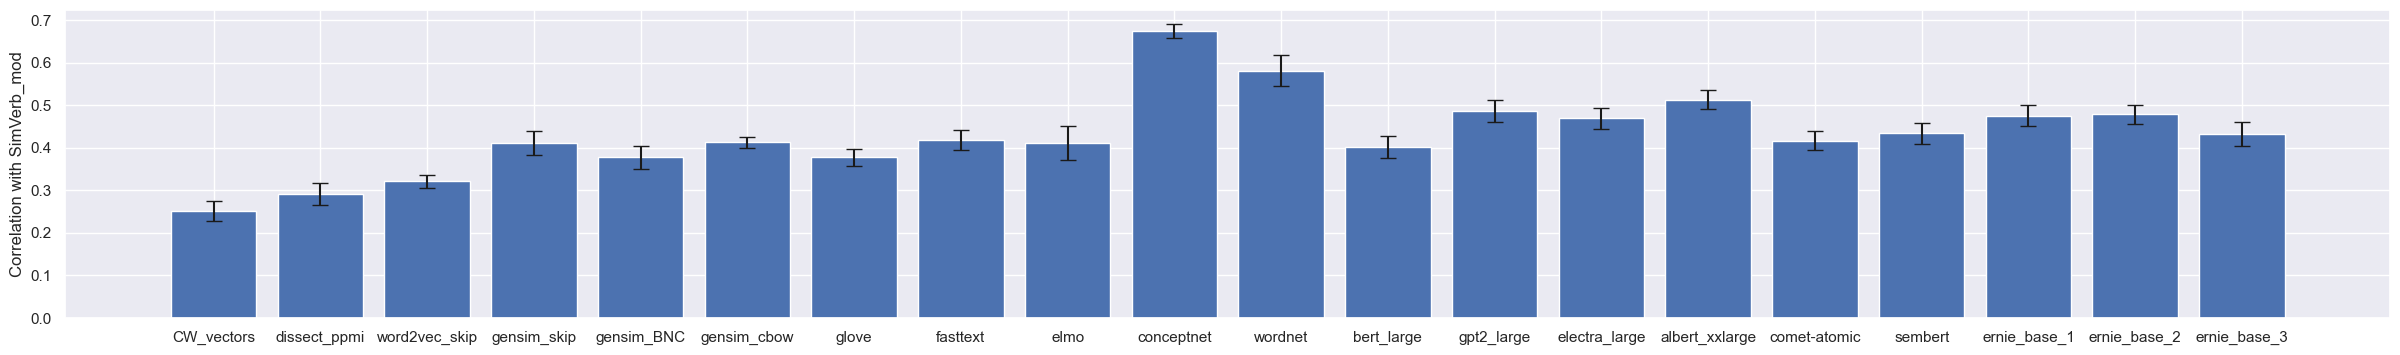

missing words: 0
means: [0.25048959 0.2916796  0.32026039 0.41058661 0.37718103 0.41196463
 0.3771444  0.41848342 0.41083046 0.673257   0.58080027 0.40057417
 0.48687896 0.46886107 0.51239626 0.41565399 0.43336564 0.47496825
 0.47842819 0.43117592]
stds: [0.01523299 0.01574498 0.0096432  0.01867414 0.01663414 0.00823161
 0.013359   0.01499809 0.02555892 0.00980228 0.02225167 0.01560587
 0.01844962 0.01434201 0.01468498 0.01389742 0.01516809 0.01539945
 0.01444281 0.01793926]
errors: [0.02418936 0.02563473 0.01553503 0.02836728 0.0273327  0.01251484
 0.01990823 0.02394872 0.03964049 0.0165545  0.03584531 0.02574696
 0.02599638 0.02439586 0.02243913 0.02224571 0.02484328 0.02445795
 0.02258843 0.02855491]


In [60]:
# Bootstrapping for Verbs
means, stds, errors = sim.plot_multi_models_bootstraps('SimVerb_mod', np.append(np.arange(0,17),np.array([18, 19, 20])), num_samples=10)

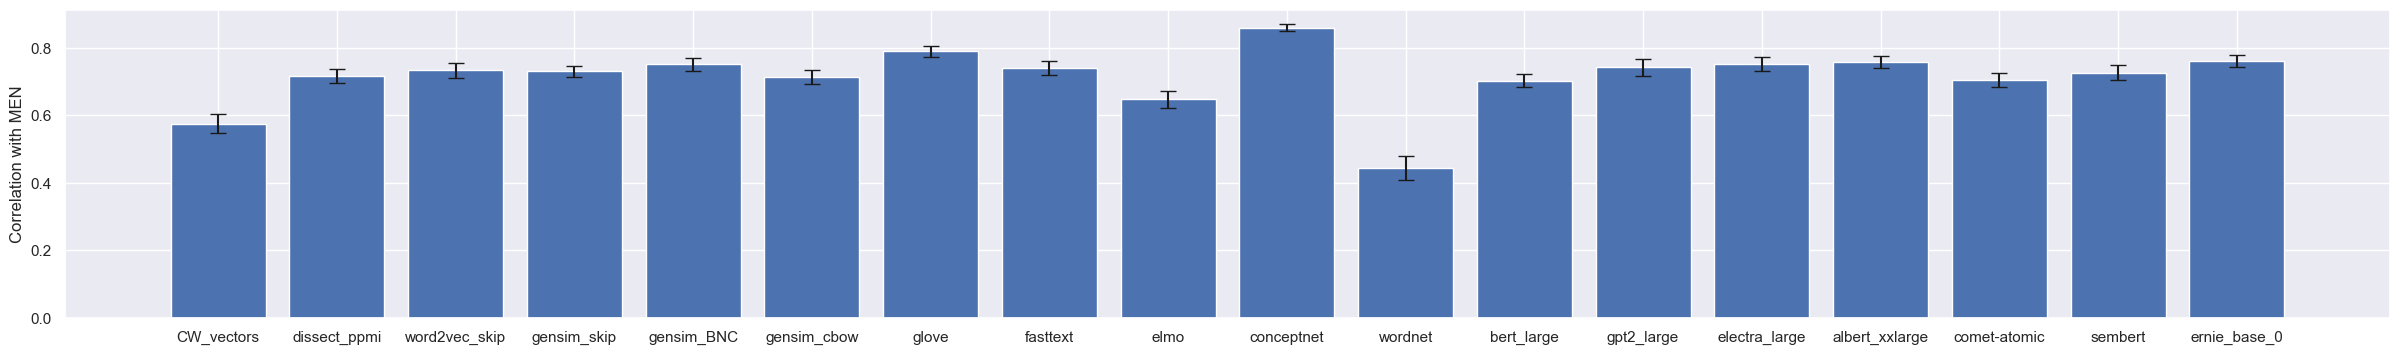

missing words: 213
means: [0.5756 0.7175 0.7335 0.7300 0.7509 0.7127 0.7900 0.7392 0.6473 0.8591 0.4437 0.7027 0.7418 0.7533 0.7580 0.7039 0.7262 0.7600]
stds: [0.0149 0.0119 0.0120 0.0094 0.0097 0.0105 0.0078 0.0113 0.0128 0.0058 0.0210 0.0113 0.0126 0.0102 0.0094 0.0117 0.0121 0.0098]
errors: [0.0286 0.0209 0.0215 0.0174 0.0193 0.0211 0.0158 0.0212 0.0244 0.0105 0.0364 0.0190 0.0254 0.0206 0.0185 0.0212 0.0219 0.0173]


In [71]:
# Bootstrapping for nouns
means, stds, errors =  sim.plot_multi_models_bootstraps('MEN', np.append(np.arange(0,18),np.array([])), num_samples=100)

## Verb Antonyms Analysis

In [53]:
# Function to add subplot to main plot with regression lines
def gen_sub_plot_mod(data, antonymn_data, fig, plot_num, y_label, x_label, linear_reg='True', poly_reg='False', label_size=16):
    
    # generate figure
    xs = data[:,0]
    ys = data[:,1]
    dot_size = 6
    fig_axis = fig.add_subplot(*plot_num) #create figure subplot
    fig_axis.scatter(xs, ys, s=dot_size) # 's' gives dot size
    if len(antonymn_data)>0: # check if we plot antonymns separately
        fig_axis.scatter(antonymn_data[:,0], antonymn_data[:,1], s=dot_size, color='orange') # add antonymns in different colour

    # set key parameters for labels on figure
    fig_axis.set_xlim(-0.02,1.02)
    fig_axis.set_ylim(-0.1,1)
    fig_axis.tick_params(axis='y', which='both', labelsize=label_size) # change size of tick labels
    fig_axis.tick_params(axis='x', which='both', labelsize=label_size)
    if y_label == '': # turn off tick labels when not needed
        fig_axis.set(yticklabels=[])
    if x_label == '':
        fig_axis.set(xticklabels=[])
    
    # calculate values needed for regressions and plotting
    x_range = np.arange(0, 1, step=0.01)
    x_range_sq = PolynomialFeatures(degree=2).fit_transform(x_range.reshape(-1, 1))
    xs_sq = PolynomialFeatures(degree=2).fit_transform(xs.reshape(-1, 1))
    
    # add linear reg line
    if linear_reg==True:
        lin_regression = sim.lin_reg(data) # linear regression
        fig_axis.plot(x_range, lin_regression.predict(x_range.reshape(-1, 1)), color='red', linewidth=1.5) 
        # r_square_lin = r2_score(ys, lin_regression.predict(xs.reshape(-1, 1)))
        # fig_axis.text(0.05, 0.85, 'R-sq: {:.3f}'.format(r_square_lin), size=label_size)
        correlation = spearmanr(ys, xs)[0]
        fig_axis.text(0.05, 0.85, 'ρ: {:.3f}'.format(correlation), size=label_size) # add label for correlation
    
    # add poly reg line
    if poly_reg==True:
        poly_regression = sim.poly_reg(data) # polynomial regression
        fig_axis.plot(x_range, poly_regression.predict(x_range_sq), color='blue', linewidth=1.5) 
        r_square_poly = r2_score(ys, poly_regression.predict(xs_sq))
        fig_axis.text(0.05, 0.85, 'R-sq: {:.3f}'.format(r_square_poly), size=label_size)
    
    # add labels
    # fig_axis.title.set_text(subheading) # subfigure figure title
    fig_axis.set_ylabel(y_label, fontsize=label_size)
    fig_axis.set_xlabel(x_label, fontsize=label_size)

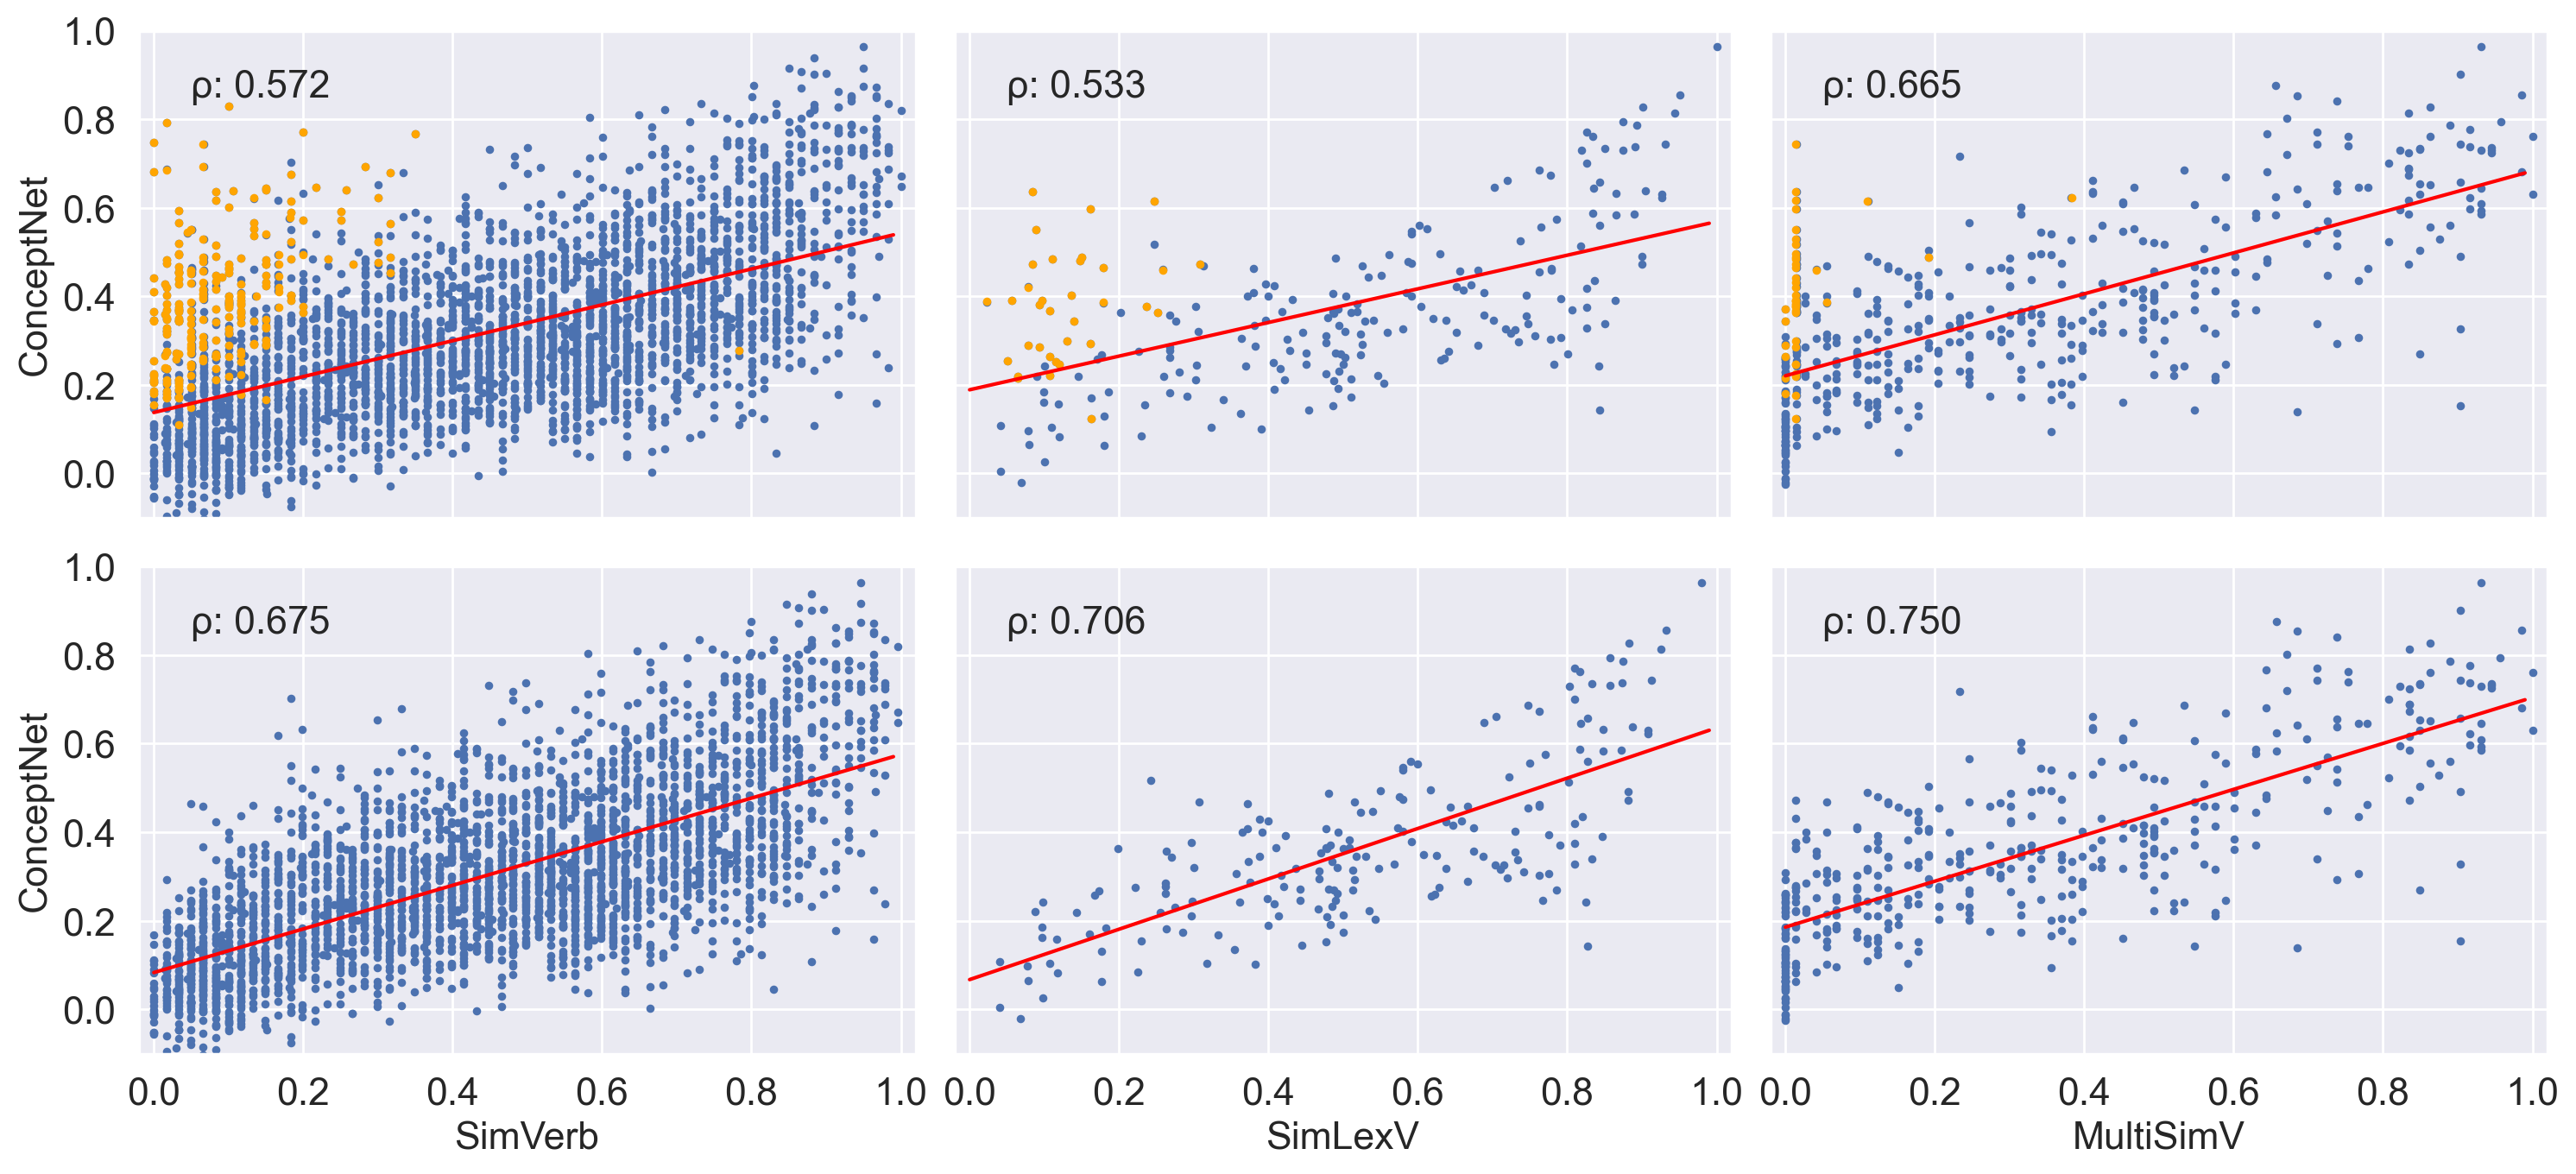

In [79]:
## Plot antonym analysis results

# Choose models to plot
model = 'ConceptNet'
model_label = 'ConceptNet'
# model = 'ernie_context_5_v'
# model_label = 'ERNIE Wiki Verb'
subplots = ['SimVerb_results','SimLexV_results','MultiSimV_results', 'SimVerb_noant_results','SimLexV_mod_results','MultiSimV_mod_results']

# Location of antonyms saved results
antonym_loc = 'Analysis Results/Word Similarities/Results for Figures/Antonyms Analysis (Figure 2)/'

# Define properties of main plot
width = 18
height = 7.5
sns.set()
fig = plt.figure(figsize=(width,height), facecolor='white', dpi=200)
fig.subplots_adjust(wspace=0.05, hspace=0.1) # space between subplots
# plt.suptitle('Effects of removing antonyms', fontsize=24)

# Generate series of subplots using add_subplot function
i=1
for subplot in subplots:

    # Get similarity data
    file_location = sim.folder_loc+'Analysis Results\Word Similarities\Word embed sims\\'+model+'_'+subplot+'.txt'
    table = pd.read_table(file_location, index_col=0, header=None, sep=",", skip_blank_lines=True)
    table = pd.DataFrame(table).rename(columns={1:'diff', 2:'data', 3:'model'})
    # table['data'] = table['data'].values+np.random.uniform(-0.008, 0.008, len(table.index)) # add jitter to experimental values
    full_data_np = table[['data','model']].to_numpy() 

    # Generate subplots with antonyms plotted
    dataset = subplot.split('_')[0] # name of expr data
    plot_num = [2,3,i] # for plotting six
    if i==1:
        filename = sim.folder_loc+antonym_loc+'SimVerb_'+model+'_antonyms.txt'
        antonyms = np.loadtxt(filename,  delimiter=',', dtype='float', skiprows=1)
        antonyms[:,0] = antonyms[:,0]
        gen_sub_plot_mod(full_data_np, antonyms, fig, plot_num, y_label=model_label, x_label='', linear_reg=True, poly_reg=False, label_size=16) # add subplot
    elif i==2:
        filename = sim.folder_loc+antonym_loc+'SimLex_'+model+'_antonyms.txt'
        antonyms = np.loadtxt(filename,  delimiter=',', dtype='float', skiprows=1)
        antonyms[:,0] = antonyms[:,0]/0.98
        gen_sub_plot_mod(full_data_np, antonyms, fig, plot_num, y_label='', x_label='', linear_reg=True, poly_reg=False, label_size=16) # add subplot
    elif i==3:
        filename = sim.folder_loc+antonym_loc+'MultiSim_'+model+'_antonyms.txt'
        antonyms = np.loadtxt(filename,  delimiter=',', dtype='float', skiprows=1)
        antonyms[:,0] = antonyms[:,0]
        gen_sub_plot_mod(full_data_np, antonyms, fig, plot_num, y_label='', x_label='', linear_reg=True, poly_reg=False, label_size=16) # add subplot
    elif i==4:
        antonyms = []
        gen_sub_plot_mod(full_data_np, antonyms, fig, plot_num, y_label=model_label, x_label=dataset, linear_reg=True, poly_reg=False, label_size=16) # add subplot
    else:
        antonyms = []
        gen_sub_plot_mod(full_data_np, antonyms, fig, plot_num, y_label='', x_label=dataset, linear_reg=True, poly_reg=False, label_size=16) # add subplot
    i=i+1

fig.subplots_adjust(top=0.90) # remove excess white space under title
plt.show()

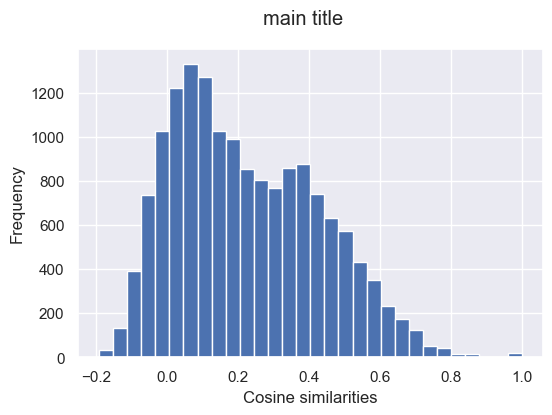

In [94]:
## Plot histogram of cosine similarities
model_sims = np.array(list(sim.model_sim_storage['ernie_context_5_n'].values()))
fig = plt.figure(figsize=(6,4))
plt.hist(model_sims, bins=30)
plt.suptitle('main title')
plt.ylabel('Frequency')
plt.xlabel('Cosine similarities')
plt.show()

## Verb Polysemy Analysis

In [81]:
# Run all verb models against all datasets
model_vs_data_dict = {} # spearman correlations
models_to_plot = np.array(sim.models)[np.arange(17,78)]
for model_name in models_to_plot:
    model_correlations = []
    excluded_models = [model for model in sim.models if model not in models_to_plot]+['wordnet']
    data, model, scale, _, _, words, word_pairs = sim.store_model_dataset_sims(model_name, 'SimVerb_mod', [], printing=True, full_import=False)
    pearson_r, spearman_r, differences = sim.compute_embed_correls(data, model, scale, printing=True)
    # sim.save_results(model_name, dataset_name, word_pairs, differences, list(np.array(data)/scale), model) # save output
    model_correlations.append(spearman_r) # add result to list
    model_vs_data_dict[model_name] = model_correlations # save in dictionary

evaluating ernie_base_0 against SimVerb_mod
included words: 822 out of 822
excluded words: 0 out of 822
missing words: 0 out of 822
pearson: 0.487 
spearman: 0.492

evaluating ernie_base_1 against SimVerb_mod
included words: 822 out of 822
excluded words: 0 out of 822
missing words: 0 out of 822
pearson: 0.484 
spearman: 0.484

evaluating ernie_base_2 against SimVerb_mod
included words: 822 out of 822
excluded words: 0 out of 822
missing words: 0 out of 822
pearson: 0.483 
spearman: 0.485

evaluating ernie_base_3 against SimVerb_mod
included words: 822 out of 822
excluded words: 0 out of 822
missing words: 0 out of 822
pearson: 0.431 
spearman: 0.429

evaluating ernie_base_4 against SimVerb_mod
included words: 822 out of 822
excluded words: 0 out of 822
missing words: 0 out of 822
pearson: 0.397 
spearman: 0.392

evaluating ernie_base_5 against SimVerb_mod
included words: 822 out of 822
excluded words: 0 out of 822
missing words: 0 out of 822
pearson: 0.362 
spearman: 0.361

evaluating

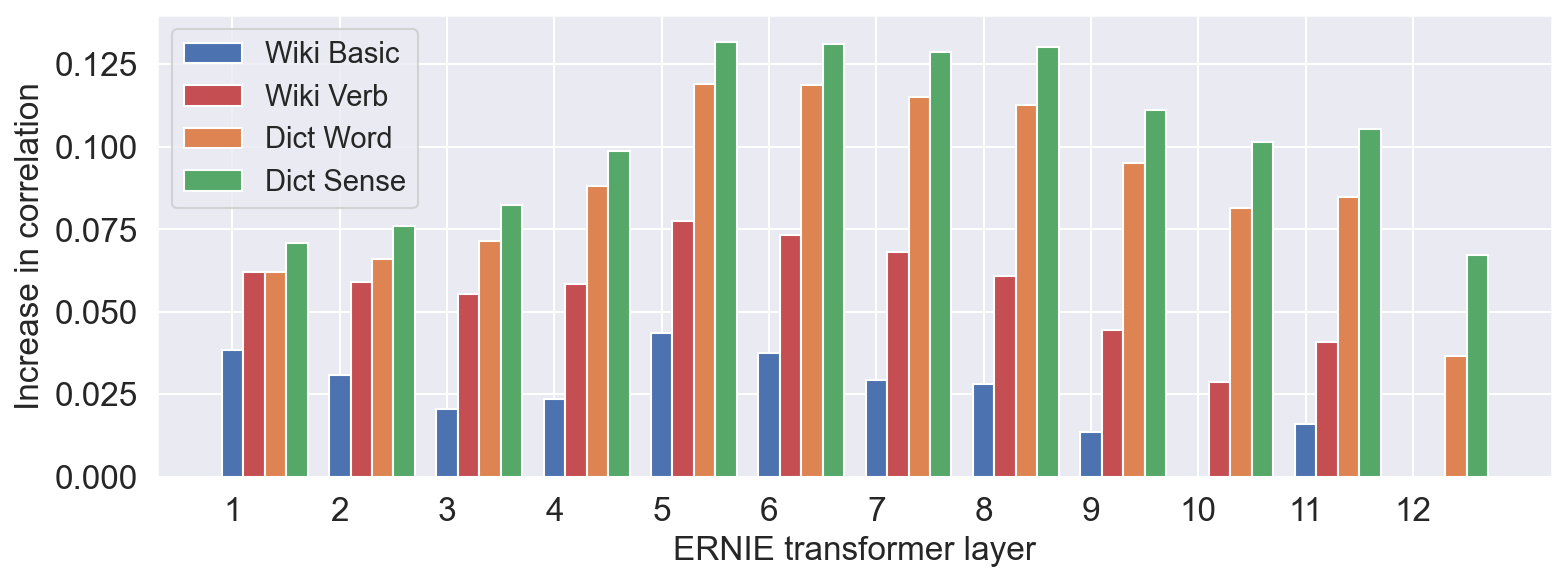

In [83]:
## Bar plot for comparing improvements due to adding context
fig, ax = plt.subplots(figsize=(12,4), dpi=150)
correlation_baseline = model_vs_data_dict['ernie_base_0'][0] # baseline model to use for comparison

# data to use
data1 = [val[0]-correlation_baseline for val in list(model_vs_data_dict.values())[13:25]]
data2 = [val[0]-correlation_baseline for val in list(model_vs_data_dict.values())[25:37]]
data3 = [val[0]-correlation_baseline for val in list(model_vs_data_dict.values())[49:61]]
data4 = np.loadtxt(sim.folder_loc+'Analysis Results\Word Similarities\Results for figures\ERNIE Transformer Analysis (Figure 3)\ernie_dict_max_simverb_correlations.txt',  delimiter=',', dtype='float')-correlation_baseline # ERNIE Dictionary data
bar_width = 0.2

# add bars and error bars
ax.bar(x=np.arange(len(data1))-3*bar_width/2, height=data1, width=bar_width, tick_label=np.arange(1,len(data1)+1), label='Wiki Basic')
# ax.errorbar(x=np.arange(len(data1))-bar_width, y=data1, yerr=errors1, fmt=',', capsize=4, color="#273be2")
ax.bar(x=np.arange(len(data2))-bar_width/2, height=data2, width=bar_width, label='Wiki Verb', color="r")
# ax.errorbar(x=np.arange(len(data2)), y=data2, yerr=errors2, fmt=',', capsize=4, color="#b22222")
ax.bar(x=np.arange(len(data3))+bar_width/2, height=data3, width=bar_width, label='Dict Word')
# ax.errorbar(x=np.arange(len(data3))+bar_width, y=data3, yerr=errors3, fmt=',', capsize=4, color="#ff4500")
ax.bar(x=np.arange(len(data4))+3*bar_width/2, height=data4, width=bar_width, label='Dict Sense')

# add labels and axes
ax.set_ylabel('Increase in correlation', fontsize=16)
ax.set_xlabel('ERNIE transformer layer', fontsize=16)
ax.set_xlim(-1,12)
ax.set_ylim(0,0.14)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.legend(fontsize=14)
plt.show()